In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error



from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
from decimal import Decimal
import datetime as dt 

In [3]:
df = pd.read_csv('C:/Users/kusha/OneDrive/Desktop/Task/OnlineRetail.csv',encoding='unicode_escape')
#df.drop('Unnamed: 0', inplace=True, axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.isna().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
df=df[~df['Quantity']<0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [8]:
df['InvoiceNo']=df['InvoiceNo'].astype('str')
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['CustomerID']=df['CustomerID'].astype('str')
df['Description']=df['Description'].astype('str')


In [9]:
df['StockCode']=df['StockCode'].astype('str')
df['Country']=df['Country'].astype("str")
df['UnitPrice']=df['UnitPrice'].apply(Decimal)

In [10]:
df['Monetary']=df['Quantity']*df['UnitPrice']
df['Monetary']=df['Monetary'].apply(Decimal)

In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.54999999999999982236431605997495353221893310...,17850.0,United Kingdom,15.29999999999999893418589636
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000000000000012434497875801753252744674682...,17850.0,United Kingdom,20.34000000000000074606987255
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000000000000012434497875801753252744674682...,17850.0,United Kingdom,20.34000000000000074606987255
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000000000000012434497875801753252744674682...,17850.0,United Kingdom,20.34000000000000074606987255
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.84999999999999997779553950749686919152736663...,12680.0,France,10.19999999999999973354647409
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10000000000000008881784197001252323389053344...,12680.0,France,12.60000000000000053290705182
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15000000000000035527136788005009293556213378...,12680.0,France,16.60000000000000142108547152
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15000000000000035527136788005009293556213378...,12680.0,France,16.60000000000000142108547152


In [12]:
df_rfmt=summary_data_from_transaction_data(transactions=df,customer_id_col='CustomerID',datetime_col='InvoiceDate',monetary_value_col='Monetary')
df_rfmt.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


In [13]:
diff_time=df['InvoiceDate'].max()-df['InvoiceDate'].min()

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.54999999999999982236431605997495353221893310...,17850.0,United Kingdom,15.29999999999999893418589636
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000000000000012434497875801753252744674682...,17850.0,United Kingdom,20.34000000000000074606987255
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000000000000012434497875801753252744674682...,17850.0,United Kingdom,20.34000000000000074606987255
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000000000000012434497875801753252744674682...,17850.0,United Kingdom,20.34000000000000074606987255
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.84999999999999997779553950749686919152736663...,12680.0,France,10.19999999999999973354647409
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10000000000000008881784197001252323389053344...,12680.0,France,12.60000000000000053290705182
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15000000000000035527136788005009293556213378...,12680.0,France,16.60000000000000142108547152
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15000000000000035527136788005009293556213378...,12680.0,France,16.60000000000000142108547152


In [15]:
diff_time=df['InvoiceDate'].max()-df['InvoiceDate'].min()

In [16]:
diff_time

Timedelta('373 days 04:24:00')

In [17]:
end_date_cal=df['InvoiceDate'].min() +dt.timedelta(days=200)
end_date_obs=end_date_cal+(diff_time-dt.timedelta(days=200))

In [18]:
end_date_cal

Timestamp('2011-06-19 08:26:00')

In [19]:
df_rfmt_cal=calibration_and_holdout_data(transactions=df,customer_id_col='CustomerID',datetime_col='InvoiceDate',calibration_period_end=end_date_cal,observation_period_end=end_date_obs)
df_rfmt_cal

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,152.0,0.0,173.0
12347.0,3.0,184.0,194.0,3.0,173.0
12348.0,2.0,110.0,185.0,1.0,173.0
12350.0,0.0,0.0,137.0,0.0,173.0
12352.0,3.0,34.0,123.0,3.0,173.0
...,...,...,...,...,...
18273.0,0.0,0.0,84.0,2.0,173.0
18280.0,0.0,0.0,104.0,0.0,173.0
18281.0,0.0,0.0,7.0,0.0,173.0


In [20]:
#calculating the monetarry value for the calibration period

calibration_period_transactions=df[df['InvoiceDate'] <= end_date_cal]
calibration_monetary=calibration_period_transactions.groupby('CustomerID')['Monetary'].mean().reset_index()
calibration_monetary.columns=['CustomerID','monetary_val_col']


In [21]:
calibration_monetary

,CustomerID,monetary_val_col
0,12346.0,77183.600000
1,12347.0,21.626961
2,12348.0,53.115714
3,12350.0,19.670588
4,12352.0,41.100263
...,...,...
2863,18273.0,51.000000
2864,18280.0,18.060000
2865,18281.0,11.545714
2866,18283.0,2.495195


In [22]:
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.54999999999999982236431605997495353221893310...,17850.0,United Kingdom,15.29999999999999893418589636
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000000000000012434497875801753252744674682...,17850.0,United Kingdom,20.34000000000000074606987255
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000000000000012434497875801753252744674682...,17850.0,United Kingdom,20.34000000000000074606987255


In [23]:
end_date_cal

Timestamp('2011-06-19 08:26:00')

In [24]:
#calculating the monetary value for the holdout period

holdout_period_transactions= df[(df['InvoiceDate'] > end_date_cal) & (df['InvoiceDate'] <= end_date_obs)]
holdout_monetary=holdout_period_transactions.groupby('CustomerID')['Monetary'].mean().reset_index()
holdout_monetary.columns=['CustomerID','monetary_val_col']

In [25]:
holdout_monetary

,CustomerID,monetary_val_col
0,12347.0,26.300625
1,12348.0,103.333333
2,12349.0,24.076027
3,12352.0,20.090000
4,12356.0,29.175000
...,...,...
3440,18277.0,13.797500
3441,18278.0,19.322222
3442,18282.0,14.837500
3443,18283.0,2.912220


In [26]:
df_rfmt_cal

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,152.0,0.0,173.0
12347.0,3.0,184.0,194.0,3.0,173.0
12348.0,2.0,110.0,185.0,1.0,173.0
12350.0,0.0,0.0,137.0,0.0,173.0
12352.0,3.0,34.0,123.0,3.0,173.0
...,...,...,...,...,...
18273.0,0.0,0.0,84.0,2.0,173.0
18280.0,0.0,0.0,104.0,0.0,173.0
18281.0,0.0,0.0,7.0,0.0,173.0


In [27]:
df_rfmt_cal=df_rfmt_cal.merge(calibration_monetary,on='CustomerID',how='left')
df_rfmt_cal=df_rfmt_cal.merge(holdout_monetary,on='CustomerID',how='left')

In [28]:
df_rfmt_cal

,CustomerID,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout,monetary_val_col_x,monetary_val_col_y
0,12346.0,0.0,0.0,152.0,0.0,173.0,77183.600000,NaN
1,12347.0,3.0,184.0,194.0,3.0,173.0,21.626961,26.300625
2,12348.0,2.0,110.0,185.0,1.0,173.0,53.115714,103.333333
3,12350.0,0.0,0.0,137.0,0.0,173.0,19.670588,NaN
4,12352.0,3.0,34.0,123.0,3.0,173.0,41.100263,20.090000
...,...,...,...,...,...,...,...,...
2863,18273.0,0.0,0.0,84.0,2.0,173.0,51.000000,76.500000
2864,18280.0,0.0,0.0,104.0,0.0,173.0,18.060000,NaN
2865,18281.0,0.0,0.0,7.0,0.0,173.0,11.545714,NaN
2866,18283.0,5.0,159.0,164.0,8.0,173.0,2.495195,2.912220


In [29]:
# we use the bg/nbd model

In [30]:
holdout_period_duration = (pd.to_datetime(end_date_obs) - pd.to_datetime(end_date_cal)).days

In [31]:
l2_coefs = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
l2_list = []
rmse_list = []

for coef in l2_coefs:
    # fitting the model using calibration dataset
    model=BetaGeoFitter(penalizer_coef=0.4)
    model.fit(df_rfmt_cal['frequency_cal'],df_rfmt_cal['recency_cal'],df_rfmt_cal['T_cal'])
    # predicting the frequency for holdout period for all customers
    df_rfmt_cal['predicted_purchases']=pd.DataFrame(model.conditional_expected_number_of_purchases_up_to_time(holdout_period_duration,df_rfmt_cal['frequency_cal'],df_rfmt_cal['recency_cal'], df_rfmt_cal['T_cal']))
    df_rfmt_cal=df_rfmt_cal.dropna()
    rmse_score = np.sqrt(mean_squared_error(df_rfmt_cal['frequency_holdout'],df_rfmt_cal['predicted_purchases']))
    l2_list.append(coef)
    rmse_list.append(rmse_score)

resl=pd.DataFrame(np.array(rmse_list),columns=['rmse_score']).merge(pd.DataFrame(np.array(l2_list),columns=['L2_Coefs']),right_index=True,left_index=True)
resl    

    

C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,rmse_score,L2_Coefs
0,2.726188,0.3
1,2.721008,0.4
2,2.717457,0.5
3,2.717457,0.6
4,2.717457,0.7
5,2.717457,0.8
6,2.717457,0.9
7,2.717457,1.0


In [32]:
df_rfmt_cal

,CustomerID,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout,monetary_val_col_x,monetary_val_col_y,predicted_purchases
1,12347.0,3.0,184.0,194.0,3.0,173.0,21.626961,26.300625,2.702452
2,12348.0,2.0,110.0,185.0,1.0,173.0,53.115714,103.333333,2.002153
4,12352.0,3.0,34.0,123.0,3.0,173.0,41.100263,20.090000,3.979005
8,12356.0,1.0,80.0,152.0,1.0,173.0,48.299649,29.175000,1.405805
9,12359.0,2.0,142.0,158.0,1.0,173.0,24.445664,27.398571,2.293876
...,...,...,...,...,...,...,...,...,...
2859,18263.0,0.0,0.0,79.0,2.0,173.0,20.506667,19.686087,0.743791
2861,18270.0,0.0,0.0,93.0,1.0,173.0,22.390000,28.533333,0.657236
2862,18272.0,1.0,21.0,73.0,4.0,173.0,17.828000,18.901261,2.512999
2863,18273.0,0.0,0.0,84.0,2.0,173.0,51.000000,76.500000,0.710379


In [33]:
rmse_score = np.sqrt(mean_squared_error(df_rfmt_cal['frequency_holdout'],df_rfmt_cal['predicted_purchases']))

In [34]:
rmse_score

2.717456878892954

In [35]:
# fitting the model using the calibration dataset
model=BetaGeoFitter(penalizer_coef=1.0)
model.fit(df_rfmt_cal['frequency_cal'],df_rfmt_cal['recency_cal'],df_rfmt_cal['T_cal'])

<lifetimes.BetaGeoFitter: fitted with 1731 subjects, a: 0.00, alpha: 19.66, b: 0.00, r: 0.34>

In [36]:
df_rfmt['predicted_purchases_post_180days'] = model.conditional_expected_number_of_purchases_up_to_time(180, 
                                                                                      df_rfmt['frequency'], 
                                                                                      df_rfmt['recency'], 
                                                                                      df_rfmt['T'])

C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
df_rfmt.dropna(inplace=True)
# Getting rid of negative values.
df_rfmt = df_rfmt[df_rfmt['monetary_value']>0]
df_rfmt

,frequency,recency,T,monetary_value,predicted_purchases_post_180days
CustomerID,,,,,
12347.0,6.0,365.0,367.0,599.701667,2.950438
12348.0,3.0,283.0,358.0,301.480000,1.590879
12352.0,6.0,260.0,296.0,368.256667,3.614074
12356.0,2.0,303.0,325.0,269.905000,1.220942
12358.0,1.0,149.0,150.0,683.200000,1.419372
...,...,...,...,...,...
18272.0,5.0,244.0,246.0,487.752000,3.616723
18273.0,2.0,255.0,257.0,76.500000,1.521040
18282.0,1.0,119.0,126.0,77.840000,1.653244


In [38]:
ggmodel=GammaGammaFitter()
ggmodel.fit(df_rfmt['frequency'],df_rfmt['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>

In [39]:
df_rfmt['pred_monetary_till_180_days'] = ggmodel.conditional_expected_average_profit(
        df_rfmt['frequency'],
        df_rfmt['monetary_value'])
df_rfmt

,frequency,recency,T,monetary_value,predicted_purchases_post_180days,pred_monetary_till_180_days
CustomerID,,,,,,
12347.0,6.0,365.0,367.0,599.701667,2.950438,569.988807
12348.0,3.0,283.0,358.0,301.480000,1.590879,333.762672
12352.0,6.0,260.0,296.0,368.256667,3.614074,376.166864
12356.0,2.0,303.0,325.0,269.905000,1.220942,324.008941
12358.0,1.0,149.0,150.0,683.200000,1.419372,539.930643
...,...,...,...,...,...,...
18272.0,5.0,244.0,246.0,487.752000,3.616723,474.369525
18273.0,2.0,255.0,257.0,76.500000,1.521040,201.781295
18282.0,1.0,119.0,126.0,77.840000,1.653244,260.275833


In [40]:
df_rfmt['CLV']=ggmodel.customer_lifetime_value(model,df_rfmt['frequency'],df_rfmt['recency'],df_rfmt['T'],df_rfmt['monetary_value'],time=6)

df_rfmt

,frequency,recency,T,monetary_value,predicted_purchases_post_180days,pred_monetary_till_180_days,CLV
CustomerID,,,,,,,
12347.0,6.0,365.0,367.0,599.701667,2.950438,569.988807,1624.391381
12348.0,3.0,283.0,358.0,301.480000,1.590879,333.762672,512.876454
12352.0,6.0,260.0,296.0,368.256667,3.614074,376.166864,1313.153514
12356.0,2.0,303.0,325.0,269.905000,1.220942,324.008941,382.111410
12358.0,1.0,149.0,150.0,683.200000,1.419372,539.930643,740.239301
...,...,...,...,...,...,...,...
18272.0,5.0,244.0,246.0,487.752000,3.616723,474.369525,1657.181002
18273.0,2.0,255.0,257.0,76.500000,1.521040,201.781295,296.455530
18282.0,1.0,119.0,126.0,77.840000,1.653244,260.275833,415.631737


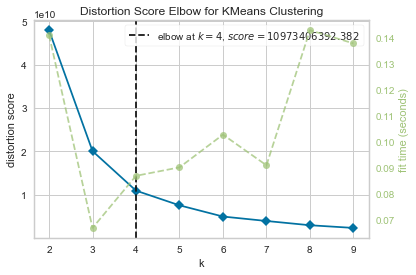

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
km_model = KMeans()
visualizer = KElbowVisualizer(km_model, k=(2,10))

visualizer.fit(df_rfmt)        # Fit the data to the visualizer
visualizer.show() 

In [42]:
km_model = KMeans(n_clusters=4)
km_model.fit(df_rfmt)
# Creating a new column called cluster whose values are the corresponding cluster for each point.
df_rfmt['cluster'] = km_model.labels_

In [43]:
df_rfmt

,frequency,recency,T,monetary_value,predicted_purchases_post_180days,pred_monetary_till_180_days,CLV,cluster
CustomerID,,,,,,,,
12347.0,6.0,365.0,367.0,599.701667,2.950438,569.988807,1624.391381,0
12348.0,3.0,283.0,358.0,301.480000,1.590879,333.762672,512.876454,0
12352.0,6.0,260.0,296.0,368.256667,3.614074,376.166864,1313.153514,0
12356.0,2.0,303.0,325.0,269.905000,1.220942,324.008941,382.111410,0
12358.0,1.0,149.0,150.0,683.200000,1.419372,539.930643,740.239301,0
...,...,...,...,...,...,...,...,...
18272.0,5.0,244.0,246.0,487.752000,3.616723,474.369525,1657.181002,0
18273.0,2.0,255.0,257.0,76.500000,1.521040,201.781295,296.455530,0
18282.0,1.0,119.0,126.0,77.840000,1.653244,260.275833,415.631737,0


In [44]:
df_clusters=df_rfmt.groupby(['cluster'])['CLV'].agg(['mean','count']).reset_index()

In [45]:
df_clusters.columns = ["cluster", "avg_CLV", "n_customers"]

In [46]:
df_clusters['perct_customers']=(df_clusters['n_customers']/df_clusters['n_customers'].sum())*100

In [47]:
df_clusters

,cluster,avg_CLV,n_customers,perct_customers
0,0,1144.236191,2759,98.888889
1,1,93518.349693,5,0.179211
2,2,80810.100686,1,0.035842
3,3,23186.421417,25,0.896057


In [48]:
df_rfmt['customer_category'] = df_rfmt['cluster']\
.replace({3:"Gold", 1:"Diamond", 2:"Silver", 0:"Bronze"})

In [49]:
df_rfmt

,frequency,recency,T,monetary_value,predicted_purchases_post_180days,pred_monetary_till_180_days,CLV,cluster,customer_category
CustomerID,,,,,,,,,
12347.0,6.0,365.0,367.0,599.701667,2.950438,569.988807,1624.391381,0,Bronze
12348.0,3.0,283.0,358.0,301.480000,1.590879,333.762672,512.876454,0,Bronze
12352.0,6.0,260.0,296.0,368.256667,3.614074,376.166864,1313.153514,0,Bronze
12356.0,2.0,303.0,325.0,269.905000,1.220942,324.008941,382.111410,0,Bronze
12358.0,1.0,149.0,150.0,683.200000,1.419372,539.930643,740.239301,0,Bronze
...,...,...,...,...,...,...,...,...,...
18272.0,5.0,244.0,246.0,487.752000,3.616723,474.369525,1657.181002,0,Bronze
18273.0,2.0,255.0,257.0,76.500000,1.521040,201.781295,296.455530,0,Bronze
18282.0,1.0,119.0,126.0,77.840000,1.653244,260.275833,415.631737,0,Bronze


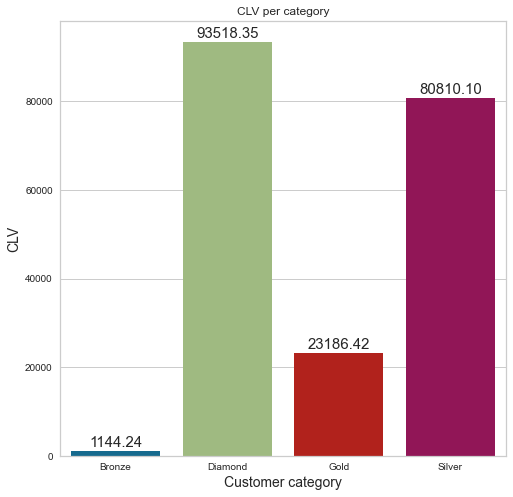

In [50]:
# Grouping by customer category
df_cat = pd.DataFrame(df_rfmt.groupby(['customer_category'])['CLV']\
                      .agg('mean')).reset_index()


# Code source : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="customer_category", y="CLV", data=df_cat)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),textcoords='offset points')

plt.xlabel("Customer category", size=14)
 
# Setting the label for y-axis
plt.ylabel("CLV", size=14)
 
# Setting the title for the graph
plt.title("CLV per category")
 
# Finally showing the plot
plt.show()

In [51]:
df_cat 

,customer_category,CLV
0,Bronze,1144.236191
1,Diamond,93518.349693
2,Gold,23186.421417
3,Silver,80810.100686


In [52]:
df_rfmt

,frequency,recency,T,monetary_value,predicted_purchases_post_180days,pred_monetary_till_180_days,CLV,cluster,customer_category
CustomerID,,,,,,,,,
12347.0,6.0,365.0,367.0,599.701667,2.950438,569.988807,1624.391381,0,Bronze
12348.0,3.0,283.0,358.0,301.480000,1.590879,333.762672,512.876454,0,Bronze
12352.0,6.0,260.0,296.0,368.256667,3.614074,376.166864,1313.153514,0,Bronze
12356.0,2.0,303.0,325.0,269.905000,1.220942,324.008941,382.111410,0,Bronze
12358.0,1.0,149.0,150.0,683.200000,1.419372,539.930643,740.239301,0,Bronze
...,...,...,...,...,...,...,...,...,...
18272.0,5.0,244.0,246.0,487.752000,3.616723,474.369525,1657.181002,0,Bronze
18273.0,2.0,255.0,257.0,76.500000,1.521040,201.781295,296.455530,0,Bronze
18282.0,1.0,119.0,126.0,77.840000,1.653244,260.275833,415.631737,0,Bronze


In [53]:
# we observe that 'Diamond and 'Gold customers contribute to more than 90% of the total CLV of the next 6 months even though they represent less than 1% of customers

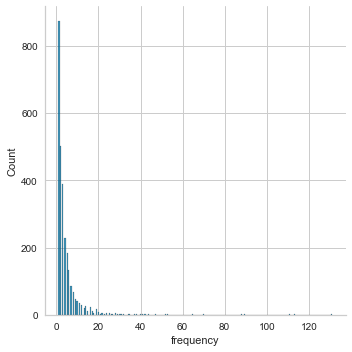

In [54]:
sns.displot(df_rfmt['frequency'])
plt.show()

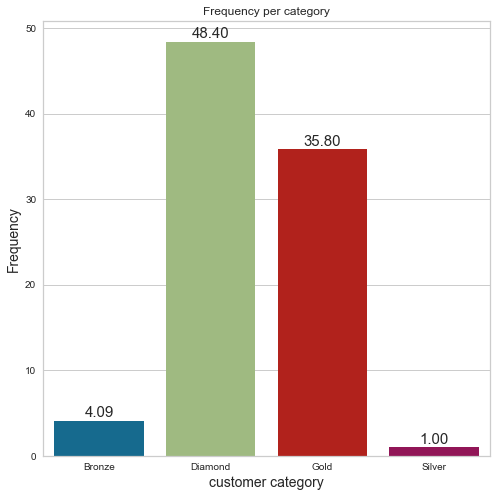

In [59]:
df_freq=pd.DataFrame(df_rfmt.groupby(['customer_category'])['frequency'].mean().reset_index())
plt.figure(figsize=(8,8))
plots=sns.barplot(x='customer_category',y='frequency',data=df_freq)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2, bar.get_height()),ha='center',va='center',size=15,xytext=(0,8),textcoords='offset points')
plt.xlabel("customer category",size=14)
plt.ylabel("Frequency",size=14)
plt.title("Frequency per category")
plt.show()

In [57]:
# diamond customers have highest products frequency

In [63]:
df_freq_2 = pd.DataFrame(df_rfmt[df_rfmt['frequency'] < 10].groupby(['customer_category'])['customer_category'].agg('count'))

In [66]:
df_freq_2.columns=['n_customers']

In [68]:
df_freq_2=df_freq_2.reset_index()

In [69]:
df_freq_2

,customer_category,n_customers
0,Bronze,2506
1,Gold,1
2,Silver,1


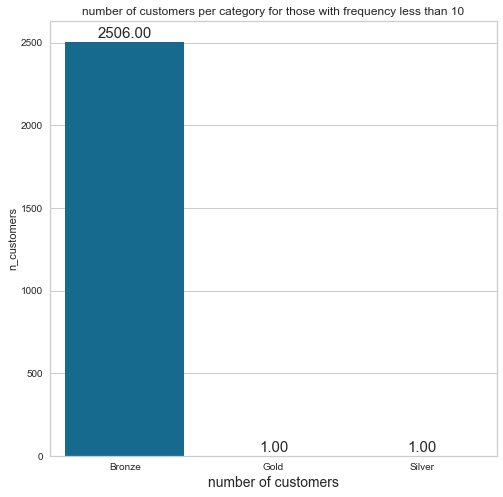

In [71]:
plt.figure(figsize=(8,8))
plots=sns.barplot(x='customer_category',y='n_customers',data=df_freq_2)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=15,xytext=(0,8),textcoords='offset points')

plt.xlabel("Customer category",size=14)
plt.xlabel("number of customers",size=14)

plt.title("number of customers per category for those with frequency less than 10")

plt.show()
